<a href="https://colab.research.google.com/github/hvr2026/Advanced-Dimensionality-Reduction/blob/main/ADR%20on%20Image%20Data%20Set/Using_Image_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn tensorflow lottie datashader plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
  Created wheel for lottie: filename=lottie-0.7.1-py3-none-any.whl size=194869 sha256=78197dd4405400c76d551bb4357367155428190a9dd05aab589b7d292bec6f9d
  Stored in directory: /root/.cache/pip/wheels/b2/80/e9/c6d8a95c6308e98d72f876e3e5e6dca882ea0581c744051e47
Successfully built lottie


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, MDS
import umap
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [29]:
import pandas as pd

In [3]:
# Load the dataset
X = np.load('/content/X.npy')
Y = np.load('/content/Y.npy')

In [4]:
# Flatten the images for processing
X_flat = X.reshape((X.shape[0], -1))

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

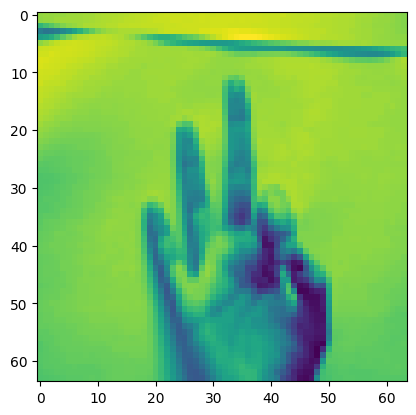

In [9]:
plt.imshow(X[15])

In [10]:
# Define a function to plot dimensionality reduction results
def plot_reduction(X_reduced, title, labels=None):
    if labels is not None:
        labels = np.argmax(labels, axis=1)
    fig = px.scatter(x=X_reduced[:, 0], y=X_reduced[:, 1], color=labels, title=title)
    fig.update_layout(xaxis_title="Component 1", yaxis_title="Component 2")
    fig.show()

In [11]:
# Function to reconstruct images (for PCA and Autoencoder)
def reconstruct_and_plot(X_train, X_reduced, X_reconstructed, method):
    f = plt.figure(figsize=(8, 4))
    f.add_subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(X_train[0].reshape((64, 64)), cmap='gray')
    f.add_subplot(1, 2, 2)
    plt.title(f"{method} Compressed")
    plt.imshow(X_reconstructed[0].reshape((64, 64)), cmap='gray')
    plt.show()

In [40]:
# 1. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plot_reduction(X_pca, "PCA", y_train)

In [41]:
# 2. Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel="rbf")
X_kernel_pca = kernel_pca.fit_transform(X_train)
plot_reduction(X_kernel_pca, "Kernel PCA", y_train)

In [42]:
# 3. Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_train)
plot_reduction(X_incremental_pca, "Incremental PCA", y_train)

In [43]:
# 4. t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)
plot_reduction(X_tsne, "t-SNE", y_train)

In [44]:
# 5. UMAP
umap_reducer = umap.UMAP(n_neighbors=10, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_train)
plot_reduction(X_umap, "UMAP", y_train)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [45]:
# 6. Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_train)
plot_reduction(X_lle, "LLE", y_train)

In [46]:
# 7. Isomap
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_train)
plot_reduction(X_isomap, "Isomap", y_train)


In [47]:
# 8. MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_train)
plot_reduction(X_mds, "MDS", y_train)

In [48]:
# 9. Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
X_fa = factor_analysis.fit_transform(X_train)
plot_reduction(X_fa, "Factor Analysis", y_train)

In [21]:
# 10. Autoencoders
def create_autoencoder(input_dim, encoding_dim=2):
    # Encoder
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(encoding_dim, activation='linear')(encoded)
    # Decoder
    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)
    # Autoencoder model
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder, encoder


In [22]:
# Train Autoencoder
input_dim = X_train.shape[1]
autoencoder, encoder = create_autoencoder(input_dim)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, verbose=1)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 538ms/step - loss: 0.0583
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0358
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0196 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0191 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0178 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0167 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167  
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━

In [25]:
#3D PCA Visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train)

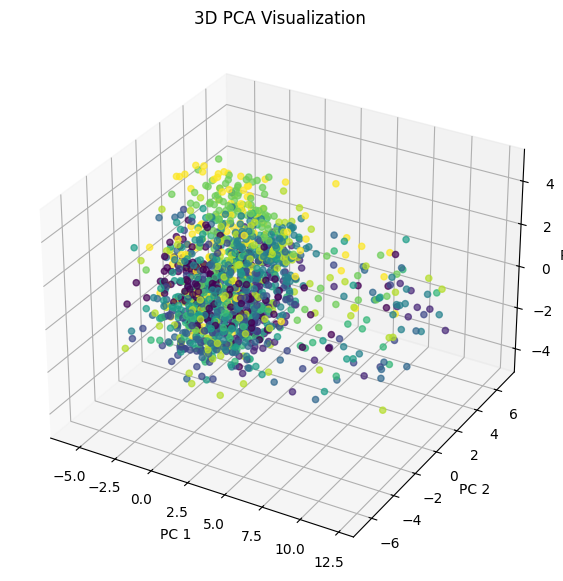

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=np.argmax(y_train, axis=1), cmap='viridis', alpha=0.7)
ax.set_title("3D PCA Visualization")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()

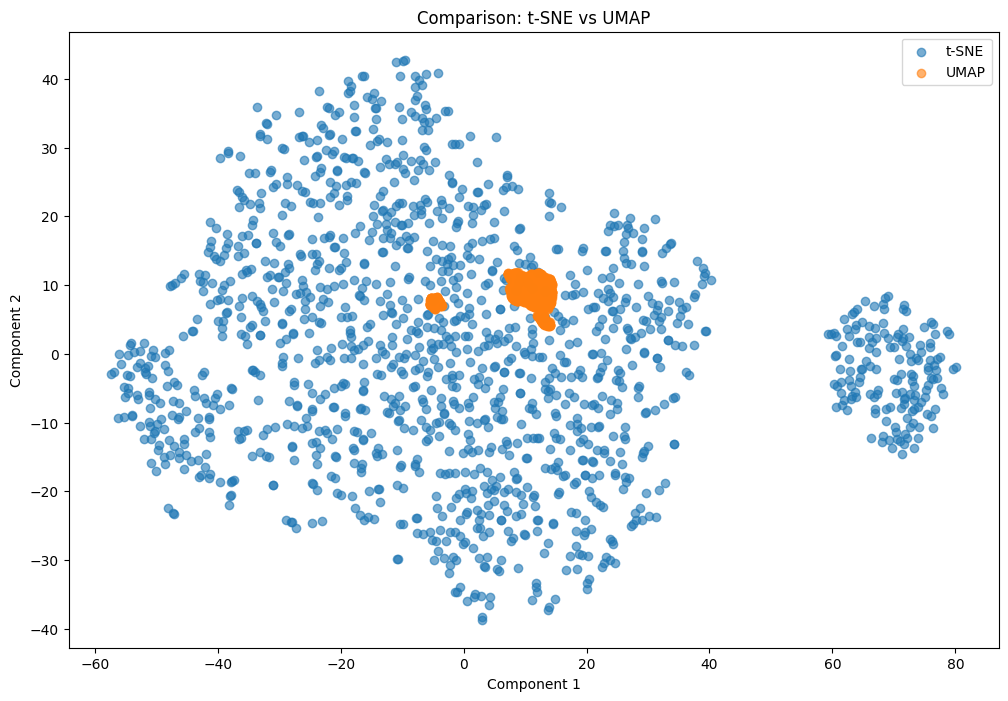

In [27]:
# Comparison of Multiple Methods
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], label='t-SNE', alpha=0.6)
plt.scatter(X_umap[:, 0], X_umap[:, 1], label='UMAP', alpha=0.6)
plt.title("Comparison: t-SNE vs UMAP")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()

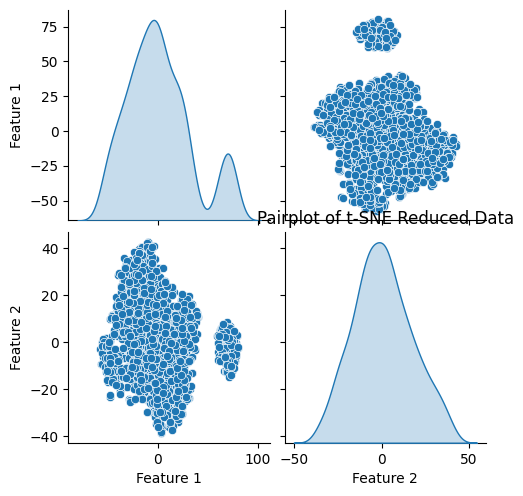

In [30]:
# Pairplot of t-SNE Reduced Data
sns.pairplot(pd.DataFrame(X_tsne, columns=['Feature 1', 'Feature 2']),
             diag_kind='kde')
plt.title("Pairplot of t-SNE Reduced Data")
plt.show()


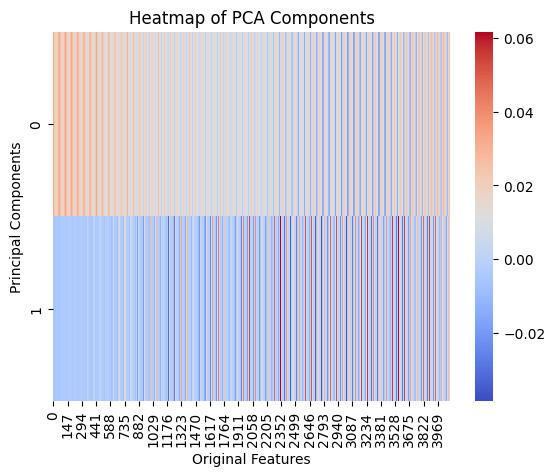

In [31]:
# Heatmap of PCA Components
sns.heatmap(pca.components_, annot=False, cmap='coolwarm')
plt.title("Heatmap of PCA Components")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()